Mounted at /content/gdrive
Essas são as frequências, obtidas 319336


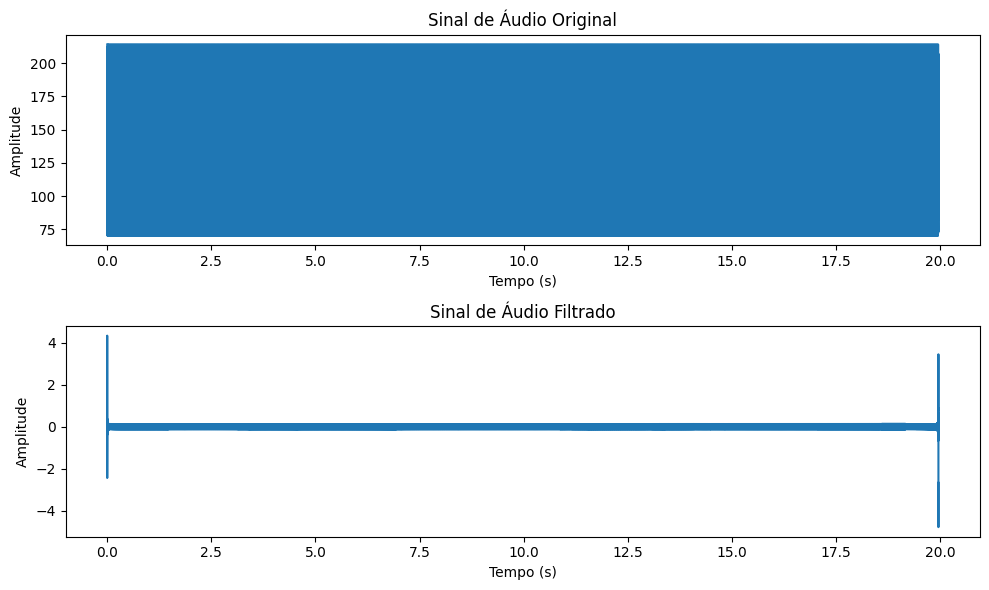

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from google.colab import drive
from scipy.io import wavfile
import os
import numpy as np
import matplotlib.pyplot as plt

# Montar o Google Drive
drive.mount('/content/gdrive')

# Caminho para o arquivo de áudio no Google Drive
caminho_arquivo = '/content/gdrive/My Drive/GRADUAÇÃO/2023.1/Processamento Digital de Sinais/Componentes de Sinal /sinal_1.wav'

# Verificar se o arquivo existe
if not os.path.exists(caminho_arquivo):
    print(f"O arquivo {caminho_arquivo} não foi encontrado.")
else:
    # Carregar o arquivo de áudio
    fs, data = wavfile.read(caminho_arquivo)

# Calcule a Transformada Rápida de Fourier (FFT)
fs, data = wavfile.read(caminho_arquivo)
n = len(data)
fft_result = np.fft.fft(data)
freq = np.fft.fftfreq(n, 1/fs)
print("Essas são as frequências, obtidas", len(freq))

# Encontre os índices dos componentes de frequência desejados (por exemplo, cossenos)
freq_cosseno1 = 1000  # Frequência do primeiro cosseno em Hz
freq_cosseno2 = 2000  # Frequência do segundo cosseno em Hz

# Encontre os índices correspondentes no vetor de frequência
index_cosseno1 = int(freq_cosseno1 * n / fs)
index_cosseno2 = int(freq_cosseno2 * n / fs)

# Zere os componentes de frequência não desejados
fft_result[:index_cosseno1] = 0
fft_result[index_cosseno2:] = 0

# Calcule a Transformada Inversa de Fourier (iFFT)
filtered_data = np.fft.ifft(fft_result)

# Visualize o sinal original e o sinal filtrado
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(data)) / fs, data)
plt.title('Sinal de Áudio Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(filtered_data)) / fs, np.real(filtered_data))
plt.title('Sinal de Áudio Filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


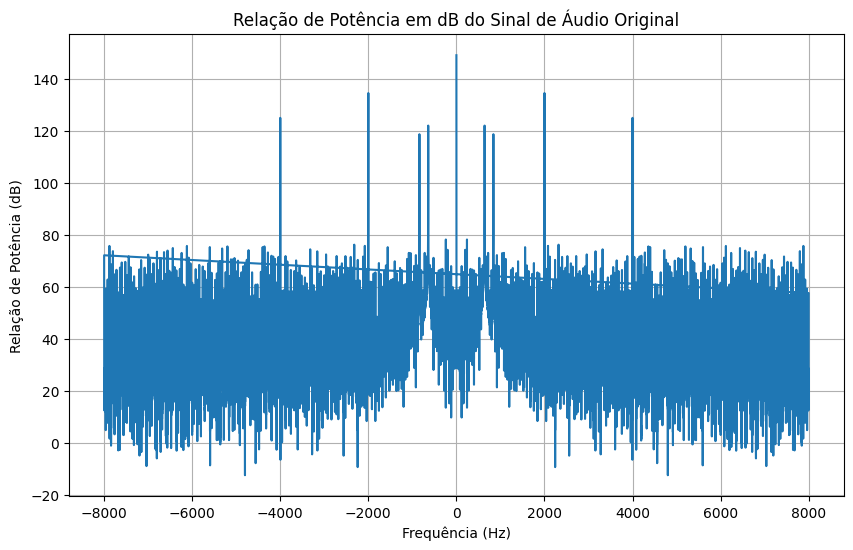

In [3]:
## RELAÇÃO DE POTÊNCIA ENTRE AS COMPONENTES ##

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Carregue o arquivo de áudio
fs, data = wavfile.read('/content/gdrive/My Drive/GRADUAÇÃO/2023.1/Processamento Digital de Sinais/Componentes de Sinal /sinal_1.wav')

# Calcule a Transformada Rápida de Fourier (FFT)
n = len(data)
fft_result = np.fft.fft(data)
freq = np.fft.fftfreq(n, 1/fs)

# Encontre as amplitudes correspondentes aos componentes de frequência
amplitudes = np.abs(fft_result)

# Calcule a potência para cada componente
potencia = (amplitudes**2) / 2

# Calcule a relação de potência em dB
relacao_potencia_dB = 10 * np.log10(potencia)

# Visualize a relação de potência em dB
plt.figure(figsize=(10, 6))
plt.plot(freq, relacao_potencia_dB)
plt.title('Relação de Potência em dB do Sinal de Áudio Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Relação de Potência (dB)')
plt.grid(True)
plt.show()


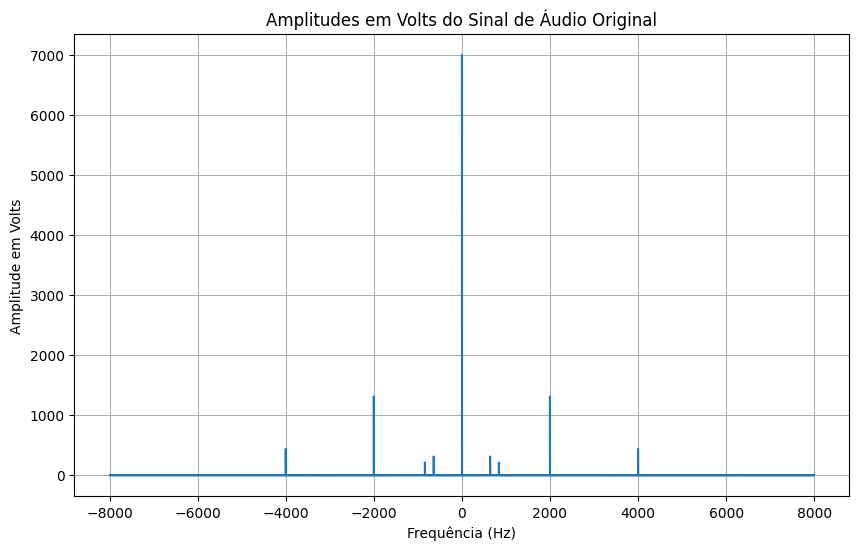

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Carregue o arquivo de áudio
#fs, data = wavfile.read('caminho/do/seu/arquivo.wav')

# Calcule a Transformada Rápida de Fourier (FFT)
n = len(data)
fft_result = np.fft.fft(data)
freq = np.fft.fftfreq(n, 1/fs)

# Encontre as amplitudes correspondentes aos componentes de frequência
amplitudes = np.abs(fft_result)

# Encontre o índice da menor frequência
indice_menor_frequencia = np.argmin(freq)

# Amplitude da menor frequência (1V no exemplo)
amplitude_menor_frequencia = amplitudes[indice_menor_frequencia]

# Calcule as amplitudes em volts para todas as frequências
amplitudes_em_volts = amplitudes / amplitude_menor_frequencia

# Visualize as amplitudes em volts
plt.figure(figsize=(10, 6))
plt.plot(freq, amplitudes_em_volts)
plt.title('Amplitudes em Volts do Sinal de Áudio Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude em Volts')
plt.grid(True)
plt.show()
